# <font color='blue'>Predicting customer churn in telecom companies</font>

In this notebook we aim to build a model to predict customer churn. But what is customer churn and why is it important for business?

Customer churn is a term given to those customers that end their business with a company, i.e., they no longer are their customers. It is said that the costs for acquiring new customers are way higher than the costs for retaining them, so making them happy and satisfied becomes really important to ensure they won't leave. Losing a customer means he will no longer be generating revenue for the company, plus the effort to acquire becomes a sunken cost.

Churn can happen in many industries, being a very common issue in the telecom industry. So how can we reduce churn? In this dataset we have information about how customers are using a certain telecom company service and whether that led to churn or not, and with those information we will try to build a model that can predict whether a customer is about to churn or not. Such information is extremely important as companies can provide special treatment to them, in order to reduce the possibility that the churn occurs.

# Takeaways

Although the application of logistic regression models is quite simple, as well its hyperparameter tuning, there's always a few additional things we can learn. For instance, how to use `class_weight` parameter when you have unbalanced data or want for some reason penalize a class during the training process, and also that it can be passed onto other frameworks.

We have also used and explored here: balancing data using SMOTE from `imblearn`, practicing a bit of feature engineering and how to use `confusion matrix`, `classification report` and some other metrics to evalute a classification model with unbalanced data.

In [1]:
# Import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
from tqdm import tqdm


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import average_precision_score, classification_report, precision_recall_curve, precision_score, recall_score,roc_auc_score 

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# Load data
train_data = pd.read_csv('//Volumes/Daniela/DataScience/Kaggle/CustomerChurn/datasets/projeto4_telecom_treino.csv', index_col = 0)
test_data = pd.read_csv('//Volumes/Daniela/DataScience/Kaggle/CustomerChurn/datasets/projeto4_telecom_teste.csv', index_col = 0)

In [3]:
# Setting the output and variables to 'output' and 'features'
output = 'churn'

y_train = train_data[output]
features = train_data.columns.tolist()
features.remove(output)

In [4]:
# Preview of train dataset
train_data.head(3).append(train_data.tail(3))

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


In [5]:
# Preview of test dataset
test_data.head(3).append(test_data.tail(3))

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
1665,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1666,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no
1667,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


# Exploratory data analysis

This dataset seems to be ok with no missing values

In [6]:
def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Great! There are no missing values in this dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)
check_missing(train_data)
check_missing(test_data)

Great! There are no missing values in this dataset.
Great! There are no missing values in this dataset.


We have categorical features and thus will convert them into numbers. We do this because some models cannot handle categorical features presented as string, so it is better to anticipate ourserlves and transform them into a format which is acceptable by all of them, as number.

In [7]:
# First I'll convert some variables from string to integer --- 'international_plan', 'voice_mail_plan', 'churn'
map_replace = {'no':0, 'yes':1}

train_data.replace(map_replace, inplace = True)
test_data.replace(map_replace, inplace = True)

The output 'churn' presents the same distribution in both datasets, but the frequency of customers who 'churned' is very low. While a low frequency of churn is good for the business, modelling it requires extra attention because the model could be biased.
Balancing the frequency of the output variable is important for training the model correctly, and a few strategies can be used to adjust it.

Class 0: 2850 (85.51%)
Class 1: 483 (14.49%)


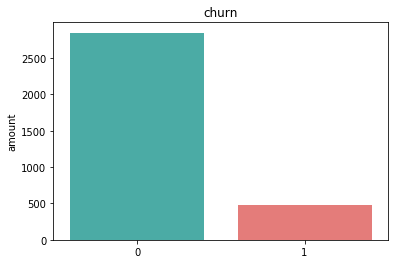

In [8]:
# Function to check the output variable
def check_output(dataset, output):
    amount = dataset[output].value_counts()
    ratio =  dataset[output].value_counts(normalize = True)*100
    print('Class 0: {} ({}%)'.format(amount[0], round(ratio[0],2)))
    print('Class 1: {} ({}%)'.format(amount[1], round(ratio[1],2)))

    labels = ['1' if label == 1 else '0' for label in dataset[output]]
    palette = {'1': '#f56b69', '0': '#3bbbb3'}

    ax = sns.countplot(labels, palette=palette)
    plt.title(output)
    plt.ylabel('amount')
    return plt.show()

check_output(train_data, 'churn')

In [9]:
train_data.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
test_data.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,0.089982,0.240552,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483,0.134373
std,39.400755,0.286242,0.427547,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179,0.341155
min,1.000000,0.000000,0.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,0.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,98.000000,0.000000,0.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000,0.000000
75%,126.000000,0.000000,0.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000,0.000000
max,238.000000,1.000000,1.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000,1.000000


Feature engineering

In [11]:
for df in [train_data, test_data]:
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
    df['total_calls']  = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls'] + df['number_customer_service_calls']
    
    df['day_min_per_call'] = df['total_day_minutes'] / df['total_day_calls']
    df['eve_min_per_call'] = df['total_eve_minutes'] / df['total_eve_calls']
    df['night_min_per_call'] = df['total_night_minutes'] / df['total_night_calls']
    df['int_min_per_call']= df['total_intl_minutes'] / df['total_intl_calls']
    
    df['day_min_ratio'] = df['total_day_minutes'] / df['total_minutes']
    df['eve_min_ratio'] = df['total_eve_minutes'] / df['total_minutes']
    df['night_min_ratio'] = df['total_night_minutes'] / df['total_minutes']
    df['int_min_ratio'] = df['total_intl_minutes'] / df['total_minutes']

    df['service_calls_ratio'] = df['number_customer_service_calls'] / df['total_calls']
    
    del df['total_minutes']
    del df['total_calls']
    del df['total_day_calls']
    del df['total_eve_calls']
    del df['total_night_calls']
    del df['total_intl_calls']
    del df['number_customer_service_calls']
    del df['total_day_minutes']
    del df['total_eve_minutes']
    del df['total_night_minutes']
    del df['total_intl_minutes']
    del df['total_day_charge']
    del df['total_eve_charge']
    del df['total_night_charge']
    del df['total_intl_charge']
    del df['number_vmail_messages']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['state','area_code']:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

#train_data = pd.get_dummies(train_data, columns = ['area_code','new_number_vmail_messages'])
#test_data = pd.get_dummies(test_data, columns = ['area_code','new_number_vmail_messages'])

In [13]:
check_missing(test_data)

,% Missing,Missing n
int_min_per_call,0.359928,6
night_min_per_call,0.059988,1
state,0.000000,0
account_length,0.000000,0
area_code,0.000000,0


We have some missing data at train and test datasets.
We will replace NaN with 0.
If you look at the missing data generated, will notice that the NaN generated comes from some of the generated features. They generated missing values because the value at both nominator and denominator were zero, because the customer didn't make any call nor had any minutes used on the period.

In [14]:
for df in [train_data,test_data]:
    df.fillna(0, inplace = True)

Now we will fix the imbalancing using SMOTE, and will also scale the data.

In [15]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

features = train_data.columns.tolist()
features.remove('churn')

sm = SMOTE(random_state = 42, ratio = 1.0)

new_X, new_y = sm.fit_sample(train_data[features], train_data[output])


## Scale ########################################
# Scale the features
new_train_data = pd.DataFrame(StandardScaler().fit_transform(new_X))
new_train_data.columns = features
new_y_train = np.array(new_y).reshape(-1,1)
new_train_data['churn'] = new_y_train

new_test_data = pd.DataFrame(StandardScaler().fit_transform(test_data[features]))
new_test_data.columns = features
new_y_test = test_data['churn']
new_test_data['churn'] = new_y_test

Now we have more data, went from 3333 to 5700, and the registers that led to churn/no-churn are equally represented.

Class 0: 2850 (50.0%)
Class 1: 2850 (50.0%)


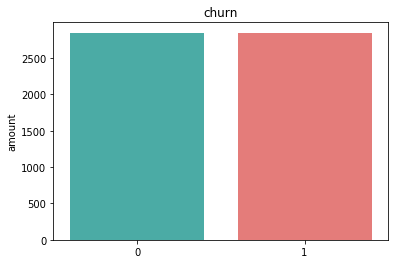

In [16]:
check_output(new_train_data, 'churn')

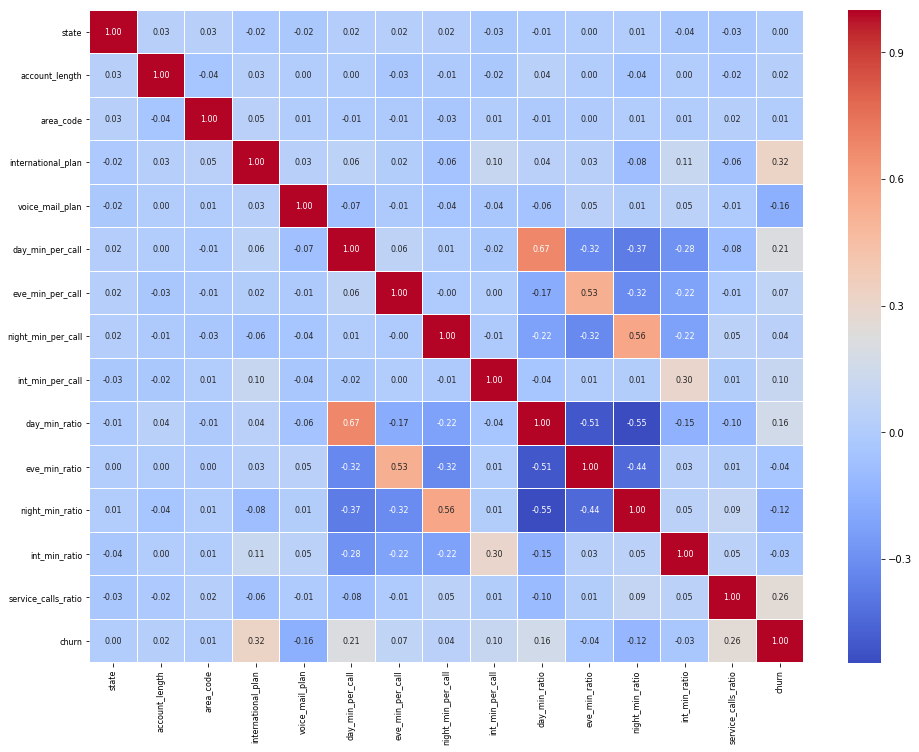

In [17]:
# Calculates the correlation and plot the data in a heatmap
sns.heatmap(new_train_data.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.01, annot_kws = {'size':8}, fmt = '.2f')
fig = plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

# Model 1: logistic regression

The first model is a basic logistic regression using default parameters

In [18]:
features = [c for c in new_train_data.columns if c not in ['churn', 'state']]

In [19]:
from sklearn.model_selection import train_test_split

X = new_train_data[features]
y = new_y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print('\nClassification Report: \n\n {}' .format(classification_report(y_test, y_pred)))


Classification Report: 

               precision    recall  f1-score   support

           0       0.73      0.77      0.75       582
           1       0.75      0.71      0.73       558

   micro avg       0.74      0.74      0.74      1140
   macro avg       0.74      0.74      0.74      1140
weighted avg       0.74      0.74      0.74      1140



In [21]:
from pandas_ml import ConfusionMatrix
y_pred_final = np.round(logistic.predict(new_test_data[features]))
y_true_final = np.array(new_y_test)

# Calculates roc
roc = roc_auc_score(y_true_final, y_pred_final)

print('Average ROC AUC on new dataset: {0:0.4f}'.format(roc))

# Plotting a confusion matrix
confusion_matrix = ConfusionMatrix(y_true_final, y_pred_final)
print("\nConfusion matrix:\n\n {}" .format(confusion_matrix))
print('\nClassification Report: \n\n {}' .format(classification_report(y_true_final, y_pred_final)))

Average ROC AUC on new dataset: 0.7335

Confusion matrix:

 Predicted  False  True  __all__
Actual                         
False        893   550     1443
True          34   190      224
__all__      927   740     1667

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.62      0.75      1443
           1       0.26      0.85      0.39       224

   micro avg       0.65      0.65      0.65      1667
   macro avg       0.61      0.73      0.57      1667
weighted avg       0.87      0.65      0.71      1667



# Model 2: Logistic regression with hyperparameter tuning

In this second model we use gridsearchCV to iterate through some different parameters until we get the one that performs best, which is used to train and evaluated against a dataset that hasn't been seen before.

In [22]:
features = [c for c in new_train_data.columns if c not in ['churn','state']]

X = new_train_data[features]
y = new_y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [23]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

logistic = LogisticRegression()#class_weight = {0:0.2, 1:.8})

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C = C,
                       penalty = penalty)

In [24]:
# Create grid search using 5-fold cross validation
n_split = 10
fold = StratifiedKFold(n_splits = n_split, shuffle = True, random_state = 123)

clf = GridSearchCV(logistic, hyperparameters, cv = fold, scoring ='roc_auc', verbose=0)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [25]:
# Predict target on test
y_pred_test = best_model.predict(X_test[features])
y_true_test = np.array(y_test)

# Calculates roc
roc = roc_auc_score(y_true_test, y_pred_test)

print('Average ROC AUC on test dataset: {0:0.4f}'.format(roc))
print('\nClassification Report: \n\n {}' .format(classification_report(y_true_test, y_pred_test)))


Average ROC AUC on test dataset: 0.7423

Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.77      0.75       582
           1       0.75      0.71      0.73       558

   micro avg       0.74      0.74      0.74      1140
   macro avg       0.74      0.74      0.74      1140
weighted avg       0.74      0.74      0.74      1140



In [26]:
# Predict target on new dataset
y_pred_final = best_model.predict(new_test_data[features])
y_true_final = np.array(new_y_test)

# Calculates roc
roc_final = roc_auc_score(y_true_final, y_pred_final)

print('Average ROC AUC on new dataset: {0:0.4f}'.format(roc_final))


# Plotting a confusion matrix
confusion_matrix = ConfusionMatrix(y_true_final, y_pred_final)
print("\nConfusion matrix:\n\n {}" .format(confusion_matrix))
print('\nClassification Report: \n\n {}' .format(classification_report(y_true_final, y_pred_final)))

Average ROC AUC on new dataset: 0.7433

Confusion matrix:

 Predicted  False  True  __all__
Actual                         
False        902   541     1443
True          31   193      224
__all__      933   734     1667

Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.63      0.76      1443
           1       0.26      0.86      0.40       224

   micro avg       0.66      0.66      0.66      1667
   macro avg       0.61      0.74      0.58      1667
weighted avg       0.87      0.66      0.71      1667



In [27]:
# Predict target on new dataset
y_pred_final_prob = best_model.predict_proba(new_test_data[features])
y_pred_final_prob = y_pred_final_prob[:, 1]
y_pred_final = (y_pred_final_prob>0.4).astype(int)
y_true_final = np.array(new_y_test)

# Calculates roc
roc_final = roc_auc_score(y_true_final, y_pred_final)

print('Average ROC AUC on new dataset: {0:0.4f}'.format(roc_final))


# Plotting a confusion matrix
confusion_matrix = ConfusionMatrix(y_true_final, y_pred_final)
print("\nConfusion matrix:\n\n {}" .format(confusion_matrix))
print('\nClassification Report: \n\n {}' .format(classification_report(y_true_final, y_pred_final)))

Average ROC AUC on new dataset: 0.7015

Confusion matrix:

 Predicted  False  True  __all__
Actual                         
False        704   739     1443
True          19   205      224
__all__      723   944     1667

Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.49      0.65      1443
           1       0.22      0.92      0.35       224

   micro avg       0.55      0.55      0.55      1667
   macro avg       0.60      0.70      0.50      1667
weighted avg       0.87      0.55      0.61      1667



AUC: 0.81


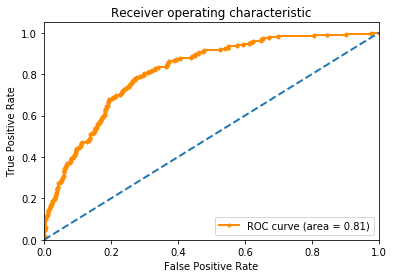

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = best_model.predict_proba(new_test_data[features])

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_true_final, probs)
print('AUC: {0:.2f}' .format(auc))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_true_final, probs)

plt.figure()
lw = 2
# plot the roc curve for the model
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='ROC curve (area = {0:0.2f})' .format(auc))
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# show the plot
plt.show()